# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
picture_size = 48
folder_path = "/content/drive/MyDrive/parcial_2_machine_learning/images/"

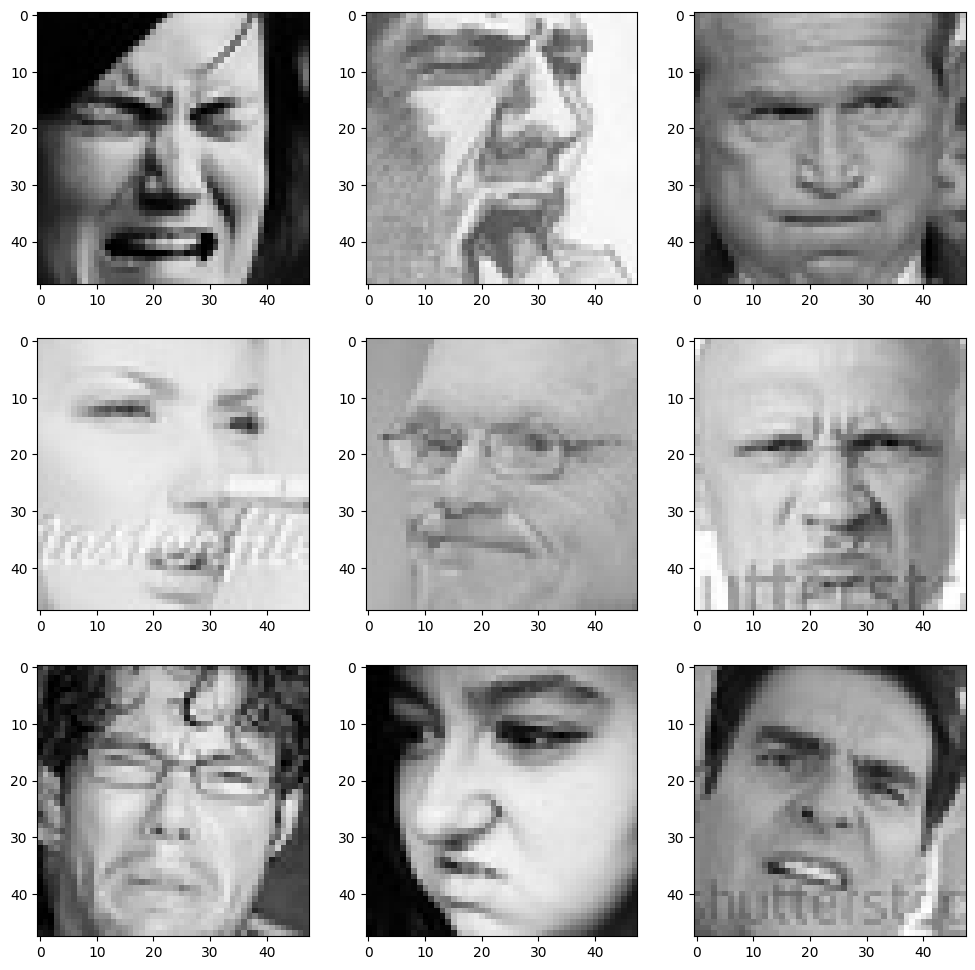

In [4]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Making Training and Validation Data

In [5]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [6]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 activation_1 (Activation)   (None, 24, 24, 128)       0         
                                                        

# Fitting the Model with Training and Validation Data

In [7]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_path = "/content/ModelCheckpoints/checkpoint.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_set,
                                steps_per_epoch=30,
                                epochs=15,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )



Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 5.8863 - accuracy: 0.1964 

30/30 [==============================] - 2441s 83s/step - loss: 5.8863 - accuracy: 0.1964 - val_loss: 1.9105 - val_accuracy: 0.2609 - lr: 0.0010
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 1.8728 - accuracy: 0.2427 

30/30 [==============================] - 628s 21s/step - loss: 1.8728 - accuracy: 0.2427 - val_loss: 1.8161 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 1.8222 - accuracy: 0.2432 

30/30 [==============================] - 537s 18s/step - loss: 1.8222 - accuracy: 0.2432 - val_loss: 1.8088 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 4/15
30/30 [==============================] - ETA: 0s - loss: 1.8127 - accuracy: 0.2503 

30/30 [==============================] - 463s 15s/step - loss: 1.8127 - accuracy: 0.2503 - val_loss: 1.8099 - val_accuracy: 0.2595 - lr: 0.0010
Epoch 5/15
30/30 [==============================] - ETA: 0s - loss: 1.8164 - accuracy: 0.2576 

30/30 [==============================] - 416s 14s/step - loss: 1.8164 - accuracy: 0.2576 - val_loss: 1.8082 - val_accuracy: 0.2594 - lr: 0.0010
Epoch 6/15
30/30 [==============================] - ETA: 0s - loss: 1.8203 - accuracy: 0.2430 

30/30 [==============================] - 342s 11s/step - loss: 1.8203 - accuracy: 0.2430 - val_loss: 1.8105 - val_accuracy: 0.2608 - lr: 0.0010
Epoch 7/15
30/30 [==============================] - ETA: 0s - loss: 1.8113 - accuracy: 0.2537

30/30 [==============================] - 310s 11s/step - loss: 1.8113 - accuracy: 0.2537 - val_loss: 1.8064 - val_accuracy: 0.2594 - lr: 0.0010
Epoch 8/15
30/30 [==============================] - ETA: 0s - loss: 1.8068 - accuracy: 0.2604

30/30 [==============================] - 280s 9s/step - loss: 1.8068 - accuracy: 0.2604 - val_loss: 1.8084 - val_accuracy: 0.2599 - lr: 0.0010
Epoch 9/15
30/30 [==============================] - ETA: 0s - loss: 1.8136 - accuracy: 0.2466

30/30 [==============================] - 248s 8s/step - loss: 1.8136 - accuracy: 0.2466 - val_loss: 1.8076 - val_accuracy: 0.2594 - lr: 0.0010
Epoch 10/15
30/30 [==============================] - ETA: 0s - loss: 1.8193 - accuracy: 0.2458Restoring model weights from the end of the best epoch: 7.



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 [==============================] - 197s 7s/step - loss: 1.8193 - accuracy: 0.2458 - val_loss: 1.8070 - val_accuracy: 0.2608 - lr: 0.0010
Epoch 10: early stopping


In [10]:
model.save('/content/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plotting Accuracy & Loss

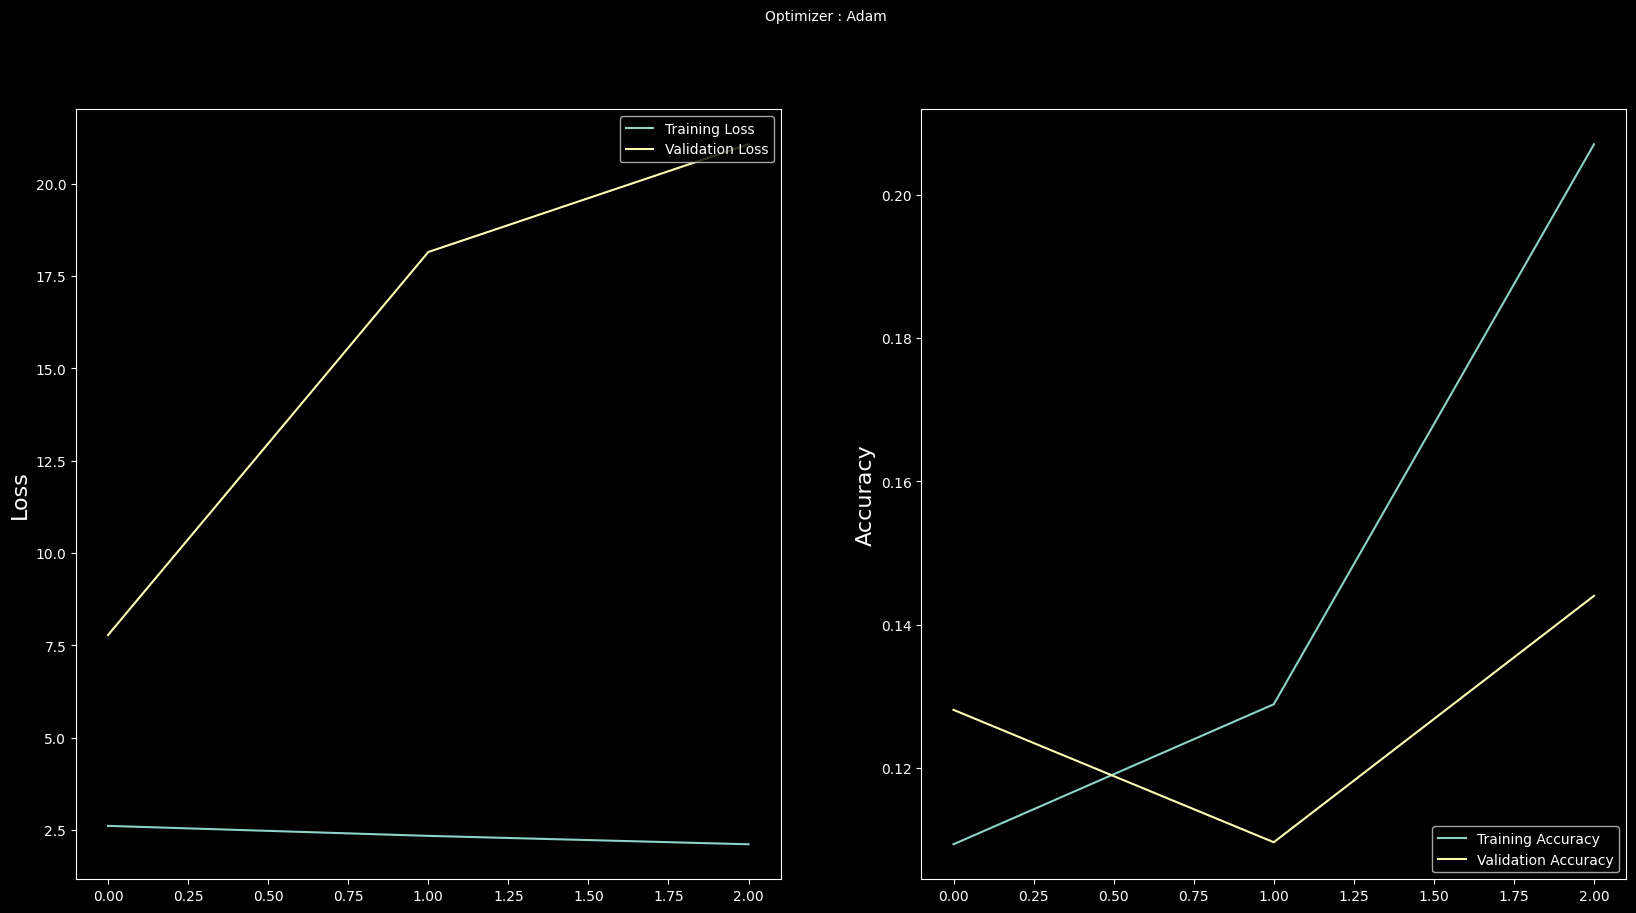

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
checkpoint.filepath
print(os.listdir('./drive'))


['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash-0']
